In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
inbody=pd.read_csv("dane_inbody.csv")[["id", "Age", "Sex", "DataBadania", "Minerals", "Protein"]].reset_index()
antropo=pd.read_csv("dane_antropo_13.csv")

In [3]:
set(inbody["DataBadania"])

{'2015.09.25. 09:13:11',
 '2015.09.25. 09:20:27',
 '2015.09.25. 09:34:48',
 '2015.09.25. 09:37:26',
 '2015.09.25. 09:55:02',
 '2015.09.25. 10:02:38',
 '2015.09.25. 10:08:38',
 '2015.09.25. 10:22:08',
 '2015.09.25. 10:28:35',
 '2015.09.25. 10:45:15',
 '2015.09.25. 11:22:36',
 '2015.09.25. 11:27:24',
 '2015.09.25. 11:38:33',
 '2015.09.25. 11:43:08',
 '2015.09.25. 11:59:26',
 '2015.09.25. 12:04:09',
 '2015.09.25. 12:09:05',
 '2015.09.25. 12:18:49',
 '2015.09.25. 12:22:32',
 '2015.09.25. 12:30:28',
 '2015.09.25. 12:33:14',
 '2015.09.25. 12:47:15',
 '2015.09.25. 12:50:44',
 '2015.09.25. 13:02:45',
 '2015.09.28. 09:05:36',
 '2015.09.28. 09:27:39',
 '2015.09.28. 09:33:11',
 '2015.09.28. 09:57:46',
 '2015.09.28. 10:09:14',
 '2015.09.28. 10:12:51',
 '2015.09.28. 10:23:54',
 '2015.09.28. 10:27:07',
 '2015.09.28. 10:30:52',
 '2015.09.28. 10:34:27',
 '2015.09.28. 10:41:32',
 '2015.09.28. 10:46:31',
 '2015.09.28. 10:57:22',
 '2015.09.28. 11:00:58',
 '2015.09.28. 11:34:56',
 '2015.09.28. 11:42:50',


In [4]:
inbody["DataBadania"] = inbody["DataBadania"].apply(lambda x: x.split('.')[0] + '.' + x.split('.')[1] + '.' + x.split('.')[2])
inbody["DataBadania"] = inbody['DataBadania'].str.replace(".", "-")
antropo["DataBadania"] = antropo['DataBadania'].str.replace(".", "-")

C:\Users\Antek\AppData\Local\Temp/ipykernel_31424/1728214445.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  inbody["DataBadania"] = inbody['DataBadania'].str.replace(".", "-")
C:\Users\Antek\AppData\Local\Temp/ipykernel_31424/1728214445.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  antropo["DataBadania"] = antropo['DataBadania'].str.replace(".", "-")


In [5]:
inbody["DataBadania"] = pd.to_datetime(inbody["DataBadania"], errors="coerce", format='%Y-%m-%d')
inbody["DataBadania"]

0     2015-09-25
1     2015-09-25
2     2015-09-25
3     2015-09-25
4     2015-09-25
         ...    
867   2019-09-25
868   2019-09-25
869   2019-09-25
870   2019-09-25
871   2019-09-26
Name: DataBadania, Length: 872, dtype: datetime64[ns]

In [6]:
set(antropo["DataBadania"])

{'09-03-2016',
 '2015-09-25',
 '2015-09-28',
 '2015-09-29',
 '2016-03-10',
 '2016-03-11',
 '2016-10-20',
 '2016-10-21',
 '2017-04-05',
 '2017-04-06',
 '2017-04-07',
 '2017-09-20',
 '2017-09-21',
 '2017-09-22',
 '2018-03-21',
 '2018-03-22',
 '2018-03-23',
 '2019-03-27',
 '2019-03-28',
 '2019-03-29',
 '2019-09-25',
 '2019-09-26',
 '2019-09-27',
 '21-09-2016',
 '22-09-2016',
 '23-09-2016',
 '26-09-2018',
 '27-09-2018'}

In [7]:
date1 = pd.to_datetime(antropo["DataBadania"], errors="coerce", format='%Y-%m-%d')
date2 = pd.to_datetime(antropo["DataBadania"], errors="coerce", format='%d-%m-%Y')
antropo["DataBadania"] = date1.fillna(date2)

In [8]:
set(antropo["DataBadania"]) #zmianiam daty na ten sam format, by połączenie dataframeów było możliwe

{Timestamp('2015-09-25 00:00:00'),
 Timestamp('2015-09-28 00:00:00'),
 Timestamp('2015-09-29 00:00:00'),
 Timestamp('2016-03-09 00:00:00'),
 Timestamp('2016-03-10 00:00:00'),
 Timestamp('2016-03-11 00:00:00'),
 Timestamp('2016-09-21 00:00:00'),
 Timestamp('2016-09-22 00:00:00'),
 Timestamp('2016-09-23 00:00:00'),
 Timestamp('2016-10-20 00:00:00'),
 Timestamp('2016-10-21 00:00:00'),
 Timestamp('2017-04-05 00:00:00'),
 Timestamp('2017-04-06 00:00:00'),
 Timestamp('2017-04-07 00:00:00'),
 Timestamp('2017-09-20 00:00:00'),
 Timestamp('2017-09-21 00:00:00'),
 Timestamp('2017-09-22 00:00:00'),
 Timestamp('2018-03-21 00:00:00'),
 Timestamp('2018-03-22 00:00:00'),
 Timestamp('2018-03-23 00:00:00'),
 Timestamp('2018-09-26 00:00:00'),
 Timestamp('2018-09-27 00:00:00'),
 Timestamp('2019-03-27 00:00:00'),
 Timestamp('2019-03-28 00:00:00'),
 Timestamp('2019-03-29 00:00:00'),
 Timestamp('2019-09-25 00:00:00'),
 Timestamp('2019-09-26 00:00:00'),
 Timestamp('2019-09-27 00:00:00')}

In [9]:
inbody.head()

,index,id,Age,Sex,DataBadania,Minerals,Protein
0,0,101,15.3,M,2015-09-25,4.67,13.5
1,1,102,14.7,M,2015-09-25,2.85,8.5
2,2,104,14.8,M,2015-09-25,3.90,11.4
3,3,105,15.2,M,2015-09-25,3.54,10.7
4,4,107,13.3,M,2015-09-25,3.17,8.9


In [10]:
dff = pd.merge(inbody, antropo, on=["id", "DataBadania"])
dff["Sex"]=dff["Sex"].replace('F',0)
dff["Sex"]=dff["Sex"].replace('M',1)
dff = dff.drop(columns=["data.badania", "index"])
#zmieniam płeć na 0 i 1

In [11]:
dff

,id,Age,Sex,DataBadania,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
0,101,15.3,1,2015-09-25,4.67,13.5,182.0,96.0,39.0,86.0,...,38.0,27.0,27.0,21.0,14.0,10.0,19.0,128.0,69.0,66.0
1,102,14.7,1,2015-09-25,2.85,8.5,167.0,84.4,31.0,72.5,...,32.8,23.8,24.1,17.4,12.0,4.0,6.0,128.0,60.0,75.0
2,104,14.8,1,2015-09-25,3.90,11.4,187.4,93.5,35.0,83.0,...,39.4,27.3,26.5,19.1,5.0,9.0,4.0,146.0,83.0,0.0
3,105,15.2,1,2015-09-25,3.54,10.7,177.9,90.0,33.0,80.0,...,37.0,26.8,26.0,17.7,11.0,6.0,8.0,121.0,80.0,92.0
4,107,13.3,1,2015-09-25,3.17,8.9,161.7,84.8,35.0,90.0,...,34.0,28.0,26.0,20.0,31.0,35.0,46.0,119.0,67.0,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,509,11.6,1,2019-09-25,36.70,4.6,156.2,81.2,33.5,70.0,...,33.0,24.2,22.9,17.2,12.0,7.0,9.0,116.0,68.0,101.0
738,510,10.3,0,2019-09-25,18.20,5.9,131.2,67.5,25.0,57.0,...,28.0,20.2,19.1,13.0,15.0,9.5,21.0,87.0,50.0,0.0
739,511,10.3,1,2019-09-25,29.60,12.7,152.3,81.3,29.0,68.0,...,31.4,24.2,20.7,17.5,24.0,10.0,27.0,111.0,67.0,50.0
740,601,10.3,1,2019-09-25,30.50,11.9,153.5,78.3,29.5,78.0,...,33.4,23.6,24.1,17.8,17.0,10.0,29.0,0.0,0.0,0.0


In [12]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,247.246631,13.875606,0.543127,21.486536,9.263881,161.251482,84.326280,31.711051,72.642588,77.365633,...,34.400809,25.468464,24.081941,17.093396,14.824798,11.272102,17.129380,104.739892,62.361860,72.555256
std,186.707020,2.633007,0.498473,20.200265,4.639348,14.210000,9.092318,3.630711,9.050008,9.429140,...,4.147913,3.013533,3.249997,2.364697,6.056328,7.061019,9.204351,36.263939,22.099719,29.407721
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,11.800000,0.000000,2.882500,6.200000,150.150000,79.000000,29.500000,67.000000,71.500000,...,31.925000,23.500000,22.200000,15.600000,10.500000,7.500000,10.000000,104.000000,61.000000,67.000000
50%,194.500000,13.650000,1.000000,5.965000,8.200000,162.050000,84.800000,31.500000,72.000000,76.000000,...,34.500000,25.750000,24.000000,17.000000,14.000000,9.500000,15.000000,114.500000,67.000000,79.000000
75%,251.000000,16.200000,1.000000,39.100000,11.275000,171.300000,89.875000,33.500000,78.000000,83.475000,...,37.000000,27.400000,26.000000,18.400000,18.000000,13.000000,23.000000,123.000000,73.875000,89.000000
max,999.000000,24.800000,1.000000,72.400000,34.600000,196.000000,175.500000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,33.000000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


In [13]:
dff.loc[dff["WysokoscSiedzeniowa"] == 0]

,id,Age,Sex,DataBadania,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
413,181,12.8,1,2018-03-22,47.7,7.5,170.3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,119.0,75.0,100.0
474,325,11.0,1,2018-03-22,28.4,2.2,143.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.0,80.0,0.0


In [14]:
dff = dff.drop(dff.loc[dff["WysokoscSiedzeniowa"] == 0].index)

In [15]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,247.231081,13.880946,0.541892,21.441770,9.275811,161.263378,84.554189,31.796757,72.838919,77.574730,...,34.493784,25.537297,24.147027,17.139595,14.864865,11.302568,17.175676,104.725676,62.320946,72.616216
std,186.921732,2.634142,0.498579,20.202934,4.637880,14.210152,7.974789,3.238656,8.234342,8.538546,...,3.747044,2.710305,3.002882,2.194090,6.015146,7.046143,9.173501,36.308925,22.115166,29.308840
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,58.800000,24.500000,56.000000,59.000000,...,18.000000,12.500000,0.000000,8.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,11.800000,0.000000,2.877500,6.200000,150.250000,79.000000,29.500000,67.000000,71.500000,...,32.000000,23.575000,22.200000,15.600000,10.500000,7.500000,10.000000,104.000000,61.000000,67.000000
50%,194.500000,13.700000,1.000000,5.605000,8.200000,162.050000,84.800000,31.500000,72.000000,76.250000,...,34.500000,25.800000,24.000000,17.000000,14.000000,9.500000,15.250000,114.500000,67.000000,79.000000
75%,251.000000,16.200000,1.000000,39.100000,11.300000,171.325000,89.900000,33.625000,78.000000,83.500000,...,37.000000,27.400000,26.000000,18.400000,18.000000,13.000000,23.000000,123.000000,73.500000,89.000000
max,999.000000,24.800000,1.000000,72.400000,34.600000,196.000000,175.500000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,33.000000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


In [16]:
dff.loc[dff["FaldNaBrzuchu"] == 0]

,id,Age,Sex,DataBadania,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
103,122,15.1,0,2016-03-10,3.68,9.5,168.8,88.9,32.0,84.0,...,28.3,28.8,20.7,33.0,25.0,34.0,0.0,107.0,63.5,80.5
572,124,17.8,0,2019-03-28,45.30,10.2,167.0,86.4,31.5,73.0,...,37.0,27.2,24.3,15.9,15.0,7.0,0.0,111.0,63.0,75.0


In [17]:
dff = dff.drop(dff.loc[dff["FaldNaBrzuchu"] == 0].index)

In [18]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,...,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000,738.000000
mean,247.567751,13.873984,0.543360,21.433509,9.274255,161.245393,84.545799,31.796883,72.823577,77.551220,...,34.498780,25.530623,24.151491,17.119783,14.850949,11.277642,17.222222,104.714092,62.318428,72.602304
std,187.062964,2.633368,0.498454,20.200636,4.644036,14.225131,7.983704,3.243020,8.235235,8.535268,...,3.744041,2.710617,3.004263,2.117380,6.011703,7.004149,9.142143,36.357325,22.145095,29.347010
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,58.800000,24.500000,56.000000,59.000000,...,18.000000,12.500000,0.000000,8.500000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000
25%,160.250000,11.800000,0.000000,2.872500,6.200000,150.150000,79.000000,29.500000,67.000000,71.500000,...,32.000000,23.525000,22.225000,15.600000,10.500000,7.500000,10.000000,104.000000,61.000000,67.000000
50%,195.000000,13.650000,1.000000,5.605000,8.200000,162.000000,84.800000,31.500000,72.000000,76.000000,...,34.500000,25.750000,24.000000,17.000000,14.000000,9.500000,15.500000,114.500000,67.000000,79.000000
75%,251.000000,16.200000,1.000000,39.100000,11.300000,171.375000,89.900000,33.875000,78.000000,83.475000,...,37.000000,27.400000,26.000000,18.400000,18.000000,13.000000,23.000000,123.000000,73.500000,89.000000
max,999.000000,24.800000,1.000000,72.400000,34.600000,196.000000,175.500000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,27.500000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


In [19]:
dff = dff.drop(dff.loc[dff["SzerokoscKlatkiPiersiowej"] == 0].index)

In [20]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,...,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,247.664402,13.872962,0.544837,21.434130,9.260326,161.231658,84.536685,31.797011,72.820380,77.552717,...,34.495380,25.524592,24.217120,17.116440,14.828804,11.264810,17.195652,104.681386,62.305027,72.577446
std,187.308084,2.635635,0.498324,20.206062,4.631719,14.241887,7.992501,3.247403,8.246038,8.546665,...,3.748234,2.711764,2.731052,2.119271,6.004582,7.009139,9.136592,36.399625,22.172017,29.382791
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,58.800000,24.500000,56.000000,59.000000,...,18.000000,12.500000,18.300000,8.500000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000
25%,160.000000,11.775000,0.000000,2.870000,6.200000,150.100000,79.000000,29.500000,67.000000,71.500000,...,32.000000,23.500000,22.300000,15.600000,10.500000,7.500000,10.000000,104.000000,61.000000,67.000000
50%,194.500000,13.650000,1.000000,5.605000,8.200000,162.000000,84.800000,31.500000,72.000000,76.000000,...,34.500000,25.700000,24.000000,17.000000,14.000000,9.500000,15.250000,114.500000,67.000000,79.000000
75%,251.000000,16.200000,1.000000,39.100000,11.300000,171.400000,89.900000,34.000000,78.000000,83.500000,...,37.000000,27.400000,26.000000,18.400000,18.000000,13.000000,23.000000,123.000000,73.625000,89.000000
max,999.000000,24.800000,1.000000,72.400000,34.600000,196.000000,175.500000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,27.500000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


In [21]:
dff = dff.drop(dff.loc[dff["TetnoKrwi"] == 0].index)

In [22]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,...,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000,654.000000
mean,247.863914,13.766514,0.555046,19.903394,8.925688,160.715291,84.286239,31.717890,72.686239,77.427064,...,34.359939,25.412538,24.183486,17.073089,14.780581,11.236850,17.063456,115.587920,68.734709,81.677370
std,188.005323,2.632480,0.497341,20.083651,4.350052,14.168236,8.023438,3.226541,8.315998,8.633135,...,3.713840,2.697693,2.751472,2.136966,5.997417,7.192552,9.276600,14.364389,9.888058,15.078682
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,65.700000,24.500000,56.000000,59.000000,...,18.000000,12.500000,18.300000,8.500000,3.000000,3.000000,4.000000,10.000000,39.000000,46.000000
25%,163.000000,11.700000,0.000000,2.760000,6.100000,149.800000,78.700000,29.000000,67.000000,71.125000,...,31.700000,23.500000,22.200000,15.500000,10.500000,7.500000,9.000000,107.625000,63.000000,72.000000
50%,192.000000,13.300000,1.000000,4.290000,8.000000,161.050000,84.500000,31.000000,71.500000,76.000000,...,34.300000,25.500000,24.000000,17.000000,14.000000,9.500000,15.000000,116.750000,68.250000,82.000000
75%,251.000000,16.000000,1.000000,37.175000,10.600000,171.000000,89.500000,33.500000,78.000000,83.000000,...,36.900000,27.300000,26.000000,18.400000,18.000000,13.000000,23.000000,124.500000,74.000000,90.000000
max,999.000000,24.800000,1.000000,72.400000,34.600000,196.000000,175.500000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,27.500000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


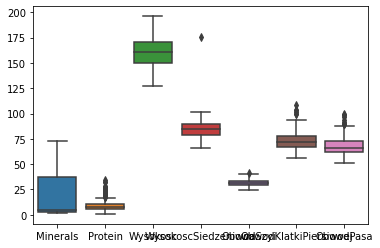

In [23]:
sns.boxplot(data=dff[["Minerals", "Protein", "Wysokosc", "WysokoscSiedzeniowa", "ObwodSzyi", "ObwodKlatkiPiersiowej", "ObwodPasa"]])
plt.show()

In [24]:
dff.loc[dff["WysokoscSiedzeniowa"] == 175.5]

,id,Age,Sex,DataBadania,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
338,241,10.8,1,2017-09-22,1.69,4.7,138.2,175.5,27.0,57.0,...,27.4,19.4,19.0,13.6,15.0,6.5,6.0,118.0,65.5,63.5


In [25]:
dff = dff.drop(dff.loc[dff["WysokoscSiedzeniowa"] == 175.5].index)

In [26]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,...,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,247.874426,13.771057,0.554364,19.931286,8.932159,160.749770,84.146554,31.725115,72.710260,77.451455,...,34.370597,25.421746,24.191424,17.078407,14.780245,11.244104,17.080398,115.584227,68.739663,81.705207
std,188.149251,2.631931,0.497417,20.086366,4.350235,14.151611,7.189860,3.223716,8.299634,8.617172,...,3.706663,2.689457,2.746077,2.134268,6.002008,7.195671,9.273580,14.375090,9.894826,15.073415
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,65.700000,24.500000,56.000000,59.000000,...,18.000000,12.500000,18.300000,8.500000,3.000000,3.000000,4.000000,10.000000,39.000000,46.000000
25%,163.000000,11.700000,0.000000,2.760000,6.100000,149.800000,78.700000,29.000000,67.000000,71.500000,...,31.700000,23.500000,22.200000,15.500000,10.500000,7.500000,9.000000,107.500000,63.000000,72.000000
50%,192.000000,13.300000,1.000000,4.320000,8.000000,161.100000,84.500000,31.000000,71.500000,76.000000,...,34.300000,25.500000,24.000000,17.000000,14.000000,9.500000,15.000000,116.500000,68.500000,82.000000
75%,251.000000,16.000000,1.000000,37.200000,10.600000,171.000000,89.500000,33.500000,78.000000,83.000000,...,36.900000,27.300000,26.000000,18.400000,18.000000,13.000000,23.000000,124.500000,74.000000,90.000000
max,999.000000,24.800000,1.000000,72.400000,34.600000,196.000000,101.000000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,27.500000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


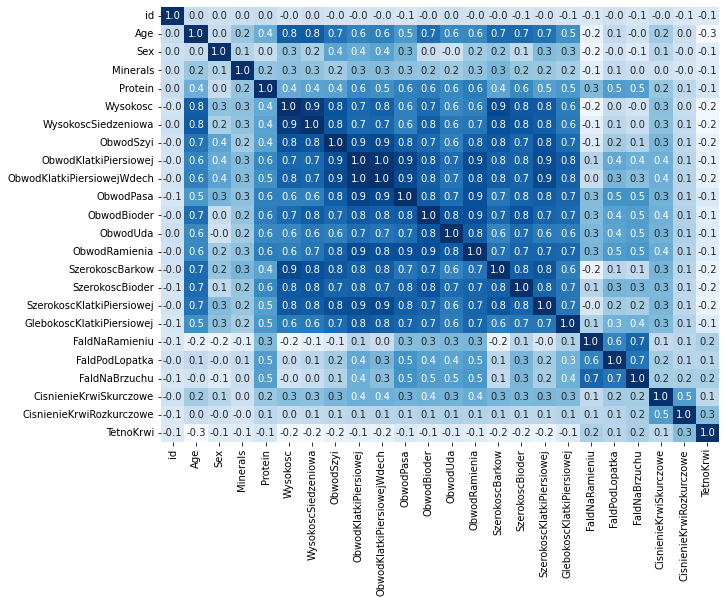

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(dff.corr(), annot=True, cbar=False, cmap='Blues', fmt='.1f')
plt.savefig("first_corr.jpg")
#sprawdzam korealcje pomiędzy poszczególnymi danymi

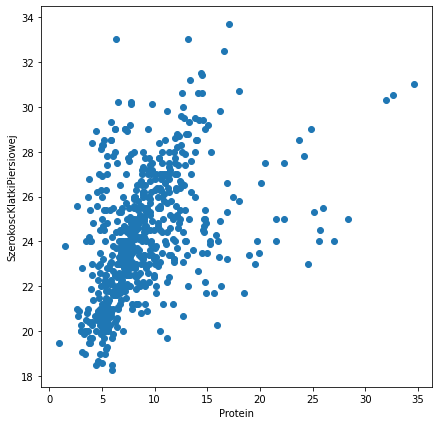

In [28]:
plt.show()
f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(dff['Protein'], dff['SzerokoscKlatkiPiersiowej'])
plt.xlabel('Protein')
plt.ylabel('SzerokoscKlatkiPiersiowej')
plt.show()

In [29]:
dff = dff.drop(dff.loc[dff["Age"] == 24.8].index)

In [30]:
dff.describe()

,id,Age,Sex,Minerals,Protein,Wysokosc,WysokoscSiedzeniowa,ObwodSzyi,ObwodKlatkiPiersiowej,ObwodKlatkiPiersiowejWdech,...,SzerokoscBarkow,SzerokoscBioder,SzerokoscKlatkiPiersiowej,GlebokoscKlatkiPiersiowej,FaldNaRamieniu,FaldPodLopatka,FaldNaBrzuchu,CisnienieKrwiSkurczowe,CisnienieKrwiRozkurczowe,TetnoKrwi
count,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,...,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000,652.000000
mean,248.036810,13.754141,0.553681,19.956273,8.929141,160.728681,84.132822,31.717025,72.701380,77.438344,...,34.366564,25.416258,24.188497,17.076687,14.789110,11.253681,17.094325,115.563650,68.733129,81.747699
std,188.247905,2.598185,0.497492,20.091629,4.352891,14.152203,7.186805,3.219550,8.302901,8.617267,...,3.708075,2.687860,2.747165,2.135454,6.002336,7.197030,9.273863,14.376499,9.901013,15.045795
min,101.000000,8.800000,0.000000,1.470000,0.900000,126.900000,65.700000,24.500000,56.000000,59.000000,...,18.000000,12.500000,18.300000,8.500000,3.000000,3.000000,4.000000,10.000000,39.000000,46.000000
25%,163.000000,11.700000,0.000000,2.760000,6.100000,149.800000,78.675000,29.000000,67.000000,71.375000,...,31.700000,23.500000,22.200000,15.500000,10.500000,7.500000,9.375000,107.500000,63.000000,72.000000
50%,192.000000,13.300000,1.000000,4.330000,8.000000,161.050000,84.500000,31.000000,71.500000,76.000000,...,34.300000,25.500000,24.000000,17.000000,14.000000,9.500000,15.000000,116.500000,68.250000,82.000000
75%,251.000000,16.000000,1.000000,37.200000,10.600000,171.000000,89.500000,33.500000,78.000000,83.000000,...,36.900000,27.300000,26.000000,18.400000,18.000000,13.000000,23.000000,124.500000,74.000000,90.125000
max,999.000000,19.200000,1.000000,72.400000,34.600000,196.000000,101.000000,41.000000,108.000000,112.000000,...,45.000000,34.900000,33.700000,27.500000,38.000000,105.000000,56.000000,190.000000,175.000000,208.000000


In [31]:
dane = dff[["Protein", "SzerokoscKlatkiPiersiowej"]]

In [32]:
dane

,Protein,SzerokoscKlatkiPiersiowej
0,13.5,27.0
1,8.5,24.1
3,10.7,26.0
4,8.9,26.0
5,7.5,23.3
...,...,...
731,16.9,25.3
733,18.5,21.7
734,14.9,21.7
737,4.6,22.9


In [33]:
dane.corr(method='pearson')

,Protein,SzerokoscKlatkiPiersiowej
Protein,1.000000,0.454166
SzerokoscKlatkiPiersiowej,0.454166,1.000000


In [34]:
dane.corr(method='spearman')

,Protein,SzerokoscKlatkiPiersiowej
Protein,1.000000,0.534489
SzerokoscKlatkiPiersiowej,0.534489,1.000000


In [35]:
X = dane.drop(['SzerokoscKlatkiPiersiowej'], axis=1)
y = dane['Protein']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle=True)
#dzielę zbiory na testowy i walidacyjny

In [37]:
ss = StandardScaler()
scaled_train= ss.fit_transform(X_train)
scaled_test = ss.fit_transform(X_test)
#skaluję dane używając standardscalera

In [38]:
lin = LinearRegression()
lin.fit(scaled_train, y_train)
print('Linear:', lin.score(scaled_test,y_test))

knn = KNeighborsRegressor()
knn.fit(scaled_train, y_train)
print('KNeighbors:', knn.score(scaled_test,y_test))

rf = RandomForestRegressor()
rf.fit(scaled_train, y_train)
print('RandomForest:', rf.score(scaled_test,y_test))

Linear: 0.9923424739337241
KNeighbors: 0.9666805019003624
RandomForest: 0.9715181256550873


In [39]:
results = {'Linear Regression': lin.score(scaled_test,y_test), 'KNeighbors': knn.score(scaled_test,y_test), 'Random Forest': rf.score(scaled_test,y_test)}
methods = list(results.keys())
accuracy_met = list(results.values())

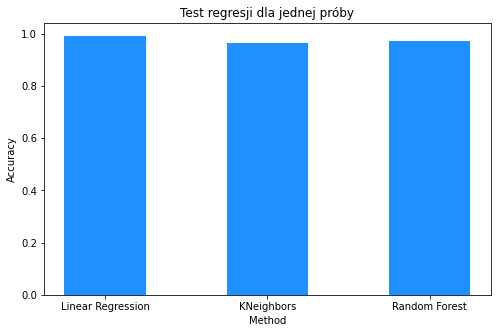

In [40]:
fig = plt.figure(figsize = (8, 5))
plt.bar(methods, accuracy_met, color = 'dodgerblue', width=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Test regresji dla jednej próby')
plt.show()

In [41]:
%%time
# Regresja liniowa dla 100 prób
lin_score = 0
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle=True)
    scaled_train = ss.fit_transform(X_train)
    scaled_test = ss.fit_transform(X_test)
    lin = LinearRegression()
    lin.fit(scaled_train, y_train)
    lin_score += lin.score(scaled_test,y_test)
print(lin_score/100)    # test trafności

0.9787763530762831
Wall time: 691 ms


In [42]:
%%time
# KNN dla 100 prób
knn_score = 0
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle=True)
    scaled_train = ss.fit_transform(X_train)
    scaled_test = ss.fit_transform(X_test)
    knn = KNeighborsRegressor()
    knn.fit(scaled_train, y_train)
    knn_score += knn.score(scaled_test,y_test)
print(knn_score/100)

0.9592989266577281
Wall time: 725 ms


In [43]:
%%time
# RandomForest dla 100 prób
rf_score = 0
for i in range (0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.3, shuffle=True)
    scaled_train = ss.fit_transform(X_train)
    scaled_test = ss.fit_transform(X_test)
    rf = RandomForestRegressor()
    rf.fit(scaled_train, y_train)
    rf_score += rf.score(scaled_test,y_test)
print(rf_score/100)

0.9721689959388395
Wall time: 10.4 s


In [44]:
results = {'Linear Regression': lin_score/100, 'KNeighbors': knn_score/100, 'Random Forest': rf_score/100}
methods = list(results.keys())
accuracy_met = list(results.values())

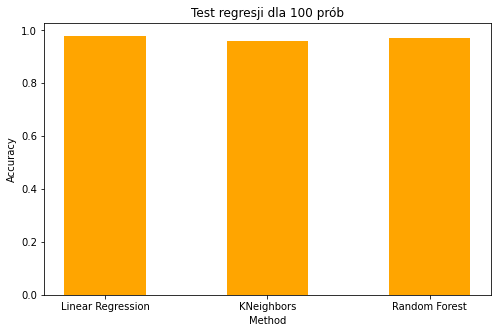

In [46]:
fig = plt.figure(figsize = (8, 5))
plt.bar(methods, accuracy_met, color = 'orange', width=0.5)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Test regresji dla 100 prób')
plt.show()